# Análise e Visualização de dados (parte 1)

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [3]:
import pandas as pd

#importando os arquivos
vendas_df = pd.read_csv(r'22-Pandas\CSV\Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'22-Pandas\CSV\Contoso - Cadastro Produtos.csv', sep=';', encoding='utf-8')
lojas_df = pd.read_csv(r'22-Pandas\CSV\Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv(r'22-Pandas\CSV\Contoso - Clientes.csv', sep=';')
promocoes_df = pd.read_csv(r'22-Pandas\CSV\Contoso - Promocoes.csv', sep=';')

# limpando apenas as colunas que queremos
# clientes_df = clientes_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1)
# promocoes_df = promocoes_df.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
promocoes_df = promocoes_df[['ID Promocao', 'Nome Promocao']]

#juntando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(promocoes_df, on='ID Promocao')
vendas_df = vendas_df.rename(columns={'E-mail':'E-mail do Cliente'})

#usaremos o display para ver 
display(vendas_df.head())

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,E-mail do Cliente,Nome da Loja,Nome Promocao
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,rbrumfieldmy@ameblo.jp,Loja Contoso Austin,Promoção de Primavera Americana
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,cshawd4@technorati.com,Loja Contoso North America Reseller,Promoção de Primavera Americana
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",kgorriekd@bandcamp.com,Loja Contoso Tehran No.2,Promoção Férias Asiáticas
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,angela49@adventure-works.com,Loja Contoso Singapore,Promoção Férias Asiáticas
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,jacob4@adventure-works.com,Loja Contoso Grand Prairie,Promoção de Primavera Americana


In [4]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
 10  Nome do Produto       980642 non-null  object
 11  E-mail do Cliente     980642 non-null  object
 12  Nome da Loja          980642 non-null  object
 13  Nome Promocao         980642 non-null  object
dtypes: int64(8), object(6)
memory usage: 104.7+ MB


### Qual cliente comprou mais venzes ?

* Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparace
* Usaremos o método .plot() para exibir um gráfico

ID Cliente
21485    56
16984    56
20009    56
12297    53
15919    53
         ..
540       1
253       1
638       1
39248     1
39360     1
Name: count, Length: 38930, dtype: int64

<Axes: xlabel='ID Cliente'>

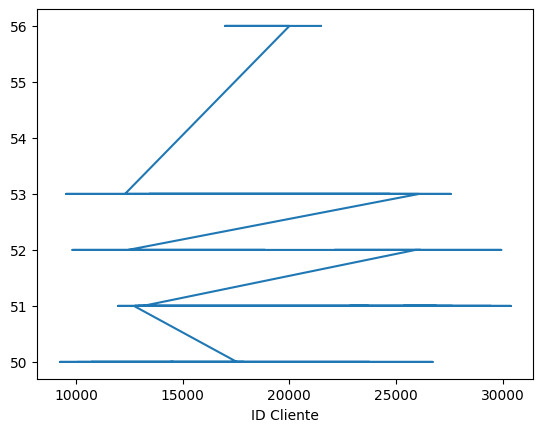

In [14]:
#vamos usar a coluna ID Cliente como referencia

frequencia_clientes1 = vendas_df['ID Cliente'].value_counts()
display(frequencia_clientes1)
frequencia_clientes1[:50].plot()

In [11]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
frequencia_clientes

E-mail do Cliente
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

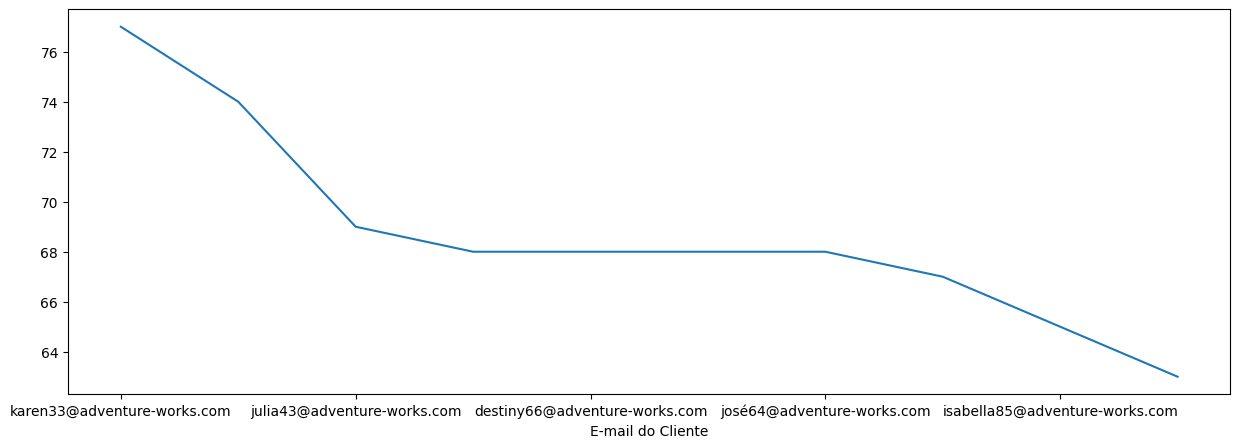

In [18]:
frequencia_clientes[:10].plot(figsize=(15,5)) #, yticks=range(10, 80, 5))

### Qual loja vendeu mais?